<a href="https://colab.research.google.com/github/neerajthandayan/Tensorflow-2.0/blob/main/CNN_CIFAR_BatchNorm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input, MaxPooling2D, BatchNormalization

In [2]:
# Fetching Dataset

data = tf.keras.datasets.cifar10

(J_train,k_train), (J_test,k_test) = data.load_data()
J_train, J_test = J_train/255, J_test/255
k_train, k_test = k_train.flatten(), k_test.flatten()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
# Finding number of classes

print(f'Number of classes: {len(set(k_train))}')

Number of classes: 10


In [7]:
# Constructing Model

i = Input(shape=J_train[0].shape)

# First level of Convolution
o = Conv2D(32, (3,3), activation='relu', padding='same')(i)
o = Conv2D(32, (3,3), activation='relu', padding='same')(o)
o = BatchNormalization()(o)
o = MaxPooling2D((2,2))(o)

# Second Level of Convolution
o = Conv2D(64, (3,3), activation='relu', padding='same')(o)
o = Conv2D(64, (3,3), activation='relu', padding='same')(o)
o = BatchNormalization()(o)
o = MaxPooling2D((2,2))(o)

# Second Level of Convolution
o = Conv2D(128, (3,3), activation='relu', padding='same')(o)
o = Conv2D(128, (3,3), activation='relu', padding='same')(o)
o = BatchNormalization()(o)
o = MaxPooling2D((2,2))(o)

o = Flatten()(o)
o = Dropout(0.2)(o)
o = Dense(512, activation='relu')(o)
o = Dropout(0.2)(o)
o = Dense(1024, activation='relu')(o)
o = Dense(10, activation='softmax')(o)

clf = Model(i,o)

In [8]:
# Compiling and Fitting Model

clf.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

result = clf.fit(J_train,k_train, validation_data=(J_test,k_test), epochs=25)

Epoch 1/25
1563/1563 [==============================] - 43s 6ms/step - loss: 1.6977 - accuracy: 0.4060 - val_loss: 1.2963 - val_accuracy: 0.5542
Epoch 2/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9832 - accuracy: 0.6617 - val_loss: 0.9790 - val_accuracy: 0.6666
Epoch 3/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7637 - accuracy: 0.7343 - val_loss: 0.9076 - val_accuracy: 0.6901
Epoch 4/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6328 - accuracy: 0.7817 - val_loss: 1.4030 - val_accuracy: 0.5743
Epoch 5/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5528 - accuracy: 0.8098 - val_loss: 0.7691 - val_accuracy: 0.7381
Epoch 6/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4715 - accuracy: 0.8372 - val_loss: 0.6392 - val_accuracy: 0.7861
Epoch 7/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4124 - accuracy: 0.8577 - val_loss: 0.6656 - val_accu

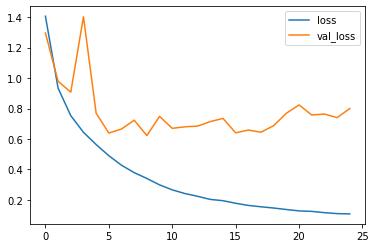

In [9]:
# Checking Loss
import matplotlib.pyplot as plt

plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()

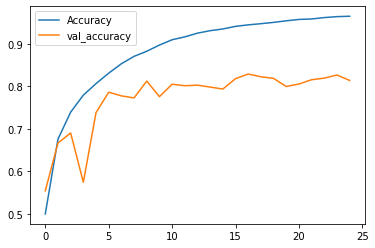

In [10]:
# Checking Accuracy

plt.plot(result.history['accuracy'], label='Accuracy')
plt.plot(result.history['val_accuracy'], label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[901  20  19  10   2   1   2   7  20  18]
 [  9 944   1   4   1   0   2   0   9  30]
 [ 73   3 762  42  33  26  30  12   5  14]
 [ 31  13  73 660  23 111  38  23   4  24]
 [ 36   4  74  82 682  38  36  41   5   2]
 [ 19   6  38 136  15 744  15  19   3   5]
 [ 12   8  33  39  13   9 865   4   8   9]
 [ 29   3  28  29  21  26   7 838   4  15]
 [ 80  26   4   4   1   1   2   1 849  32]
 [ 20  68   6   6   0   2   0   0   6 892]]


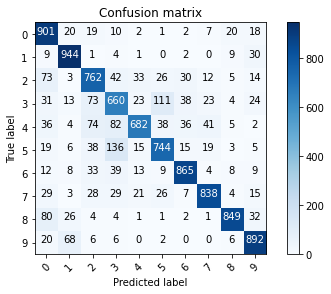

In [11]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = clf.predict(J_test).argmax(axis=1)
cm = confusion_matrix(k_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [12]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

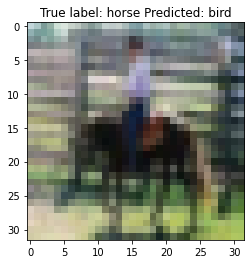

In [25]:
# Show some misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != k_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(J_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[k_test[i]], labels[p_test[i]]));